# Text Preprocessing with Keras

In [2]:
# importing libraries

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D
import tsensor
import numpy as np

## Tokenization

In [3]:
# Tokenising sentences
sentences = [
    'The quick brown fox jumps over the lazy dog.'
]
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)

In [4]:
tokenizer.word_index

{'the': 1,
 'quick': 2,
 'brown': 3,
 'fox': 4,
 'jumps': 5,
 'over': 6,
 'lazy': 7,
 'dog': 8}

In [5]:
train_sequence = tokenizer.texts_to_sequences(sentences)
train_sequence = np.array(train_sequence)
print(train_sequence)

[[1 2 3 4 5 6 1 7 8]]


## Creating Embedding Layer

In [6]:
# Create a random embedding layer

embedding = Embedding(input_dim=len(train_sequence[0]), output_dim=128)

In [7]:
# Get the embeddings of the train sample

train_sample = embedding(train_sequence)

In [8]:
train_sequence.shape

(1, 9)

In [9]:
train_sample.shape

TensorShape([1, 9, 128])

findfont: Font family ['Hack'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Hack'] not found. Falling back to DejaVu Sans.


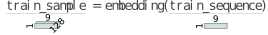

In [10]:
with tsensor.explain(fontname='Hack', dimfontname='Hack'):
    train_sample = embedding(train_sequence)

In [11]:
train_sample[0]

<tf.Tensor: shape=(9, 128), dtype=float32, numpy=
array([[-0.04727444,  0.01039924, -0.04580874, ..., -0.00196522,
         0.04018035, -0.04204149],
       [-0.0131333 , -0.00837497, -0.01374782, ..., -0.03311627,
         0.02151633,  0.02286953],
       [-0.00685704, -0.03272296,  0.01513976, ..., -0.00452409,
        -0.03723332,  0.03449873],
       ...,
       [-0.04727444,  0.01039924, -0.04580874, ..., -0.00196522,
         0.04018035, -0.04204149],
       [-0.00303955,  0.00199593, -0.03817888, ...,  0.01369889,
        -0.01387114, -0.00191207],
       [-0.0070358 ,  0.02540957,  0.04971284, ...,  0.02060271,
         0.01762554,  0.03283051]], dtype=float32)>

## Averaging across tokens

In [12]:
GlobalAveragePooling1D()(train_sample)

<tf.Tensor: shape=(1, 128), dtype=float32, numpy=
array([[-0.0054358 , -0.00841092, -0.01533361, -0.00827784, -0.01920824,
         0.00153534, -0.01635499, -0.01236192, -0.0195717 , -0.00771779,
        -0.01207488, -0.02005798,  0.01822707,  0.00279916, -0.01165883,
         0.01158109, -0.00363123, -0.01181414,  0.00899139,  0.00620875,
         0.01724926, -0.0016682 , -0.00047922, -0.0107089 ,  0.01938923,
        -0.00735564, -0.00557916,  0.00949607,  0.01971504, -0.02025501,
        -0.00863008, -0.0057634 ,  0.01364216,  0.00304352, -0.02458296,
        -0.00129984, -0.01420717, -0.00117182, -0.01757186, -0.00375896,
        -0.01512048, -0.00420023,  0.02238438,  0.00527688,  0.01698574,
        -0.0055852 , -0.01442541, -0.01912543,  0.00774891, -0.0049029 ,
         0.01751989, -0.01602735,  0.00343602, -0.0090942 , -0.01240251,
         0.00649875,  0.01194022, -0.01561443,  0.00405858, -0.00830332,
         0.00179123,  0.0043425 , -0.00341475, -0.00711675, -0.00068299,
 

![](images/Emb6.png)

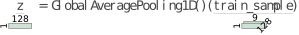

In [13]:
with tsensor.explain(fontname='Hack', dimfontname='Hack'):
    z = GlobalAveragePooling1D()(train_sample)

## Creating Word Embeddings for more than one sentence

In [14]:
# More than one sentence

test_corpus = [
    'The quick brown fox jumps over the lazy dog.',
    'The quick brown fox.',
    'The lazy dog.',
    'The dog.',
    'Dog and the fox.',
    'Hello, world!'
]
encoded_sentences = tokenizer.texts_to_sequences(test_corpus)
for sentence, encoded_sentence in zip(test_corpus, encoded_sentences):
    print(sentence, encoded_sentence)

The quick brown fox jumps over the lazy dog. [1, 2, 3, 4, 5, 6, 1, 7, 8]
The quick brown fox. [1, 2, 3, 4]
The lazy dog. [1, 7, 8]
The dog. [1, 8]
Dog and the fox. [8, 1, 4]
Hello, world! []


## Padding Sequences

In [15]:
# Length of each sentence in the corpus

[len(sentence) for sentence in encoded_sentences]

[9, 4, 3, 2, 3, 0]

In [16]:
# Length of the longest sentence

max([len(sentence) for sentence in encoded_sentences])

9

In [17]:
MAX_SEQUENCE_LENGTH = 9

In [18]:
# Padding sequences that are shorter than the longest sequence

X = pad_sequences(encoded_sentences, maxlen=MAX_SEQUENCE_LENGTH)
X

array([[1, 2, 3, 4, 5, 6, 1, 7, 8],
       [0, 0, 0, 0, 0, 1, 2, 3, 4],
       [0, 0, 0, 0, 0, 0, 1, 7, 8],
       [0, 0, 0, 0, 0, 0, 0, 1, 8],
       [0, 0, 0, 0, 0, 0, 8, 1, 4],
       [0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int32)

## Embedding Layer

In [19]:
# Training data with more than 1 sentences

X.shape

(6, 9)

In [20]:
# Embeddings of the larger corpus

X_embedded = embedding(X)

In [21]:
X_embedded.shape

TensorShape([6, 9, 128])

In [22]:
X_embedded

<tf.Tensor: shape=(6, 9, 128), dtype=float32, numpy=
array([[[-0.04727444,  0.01039924, -0.04580874, ..., -0.00196522,
          0.04018035, -0.04204149],
        [-0.0131333 , -0.00837497, -0.01374782, ..., -0.03311627,
          0.02151633,  0.02286953],
        [-0.00685704, -0.03272296,  0.01513976, ..., -0.00452409,
         -0.03723332,  0.03449873],
        ...,
        [-0.04727444,  0.01039924, -0.04580874, ..., -0.00196522,
          0.04018035, -0.04204149],
        [-0.00303955,  0.00199593, -0.03817888, ...,  0.01369889,
         -0.01387114, -0.00191207],
        [-0.0070358 ,  0.02540957,  0.04971284, ...,  0.02060271,
          0.01762554,  0.03283051]],

       [[ 0.00552771, -0.00570865, -0.02845522, ...,  0.0476304 ,
          0.03817469, -0.04970838],
        [ 0.00552771, -0.00570865, -0.02845522, ...,  0.0476304 ,
          0.03817469, -0.04970838],
        [ 0.00552771, -0.00570865, -0.02845522, ...,  0.0476304 ,
          0.03817469, -0.04970838],
        ...,
 

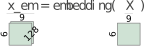

In [23]:
with tsensor.explain(fontname='Hack', dimfontname='Hack'):
    x_em = embedding(X)

In [24]:
X.shape

(6, 9)

In [25]:
x_em.shape

TensorShape([6, 9, 128])

## Averaging across tokens

![](images/Emb6.png)

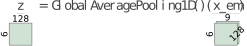

In [26]:
with tsensor.explain(fontname='Hack', dimfontname='Hack'):
    z = GlobalAveragePooling1D()(x_em)

In [27]:
z.shape

TensorShape([6, 128])